Using Jupyterlite we have to install packages using piplite before we can use them. This means importing piplite, then using it to install our packages, as below, then importing packages as usual. Note the package is passed to the install method as a string (in quotes)

In [78]:
import piplite
await piplite.install('pandas')
await piplite.install('matplotlib')

import pandas as pd
import matplotlib.pyplot as plt

Below we are using pandas read_csv method to read the csv stored at the filepath shown as the variable data, and then we are printing the info about the dataframe we store in data.

In [7]:
data = pd.read_csv('data/spc_pupils_ethnicity_and_language_.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154192 entries, 0 to 154191
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time_period          154192 non-null  int64  
 1   time_identifier      154192 non-null  object 
 2   geographic_level     154192 non-null  object 
 3   country_code         154192 non-null  object 
 4   country_name         154192 non-null  object 
 5   region_name          153065 non-null  object 
 6   region_code          153065 non-null  object 
 7   old_la_code          142922 non-null  float64
 8   la_name              142922 non-null  object 
 9   new_la_code          142922 non-null  object 
 10  phase_type_grouping  154192 non-null  object 
 11  ethnicity            154192 non-null  object 
 12  language             154192 non-null  object 
 13  headcount            154192 non-null  int64  
 14  percent_of_pupils    154192 non-null  float64
dtypes: float64(2), in

Below we are setting up a condition to only select rows of our dataframe data where the la_name column is Wigan. condition gets a column of True and False values, depending on the value of la_name in each row. If you print it, you'll get an index, and a colum of True and Falses. We then slice out the data dataframe using this column of True and False values, returning only rows where it's true. Note, we don't need to set this line == True. We call this dataframe wigan. FInally, we print it.

In [63]:
condition = data['la_name'] == 'Wigan'
wigan = data[condition]
print(wigan)

        time_period time_identifier geographic_level country_code  \
2287         202122   Academic year  Local authority    E92000001   
2288         202122   Academic year  Local authority    E92000001   
2289         202122   Academic year  Local authority    E92000001   
2290         202122   Academic year  Local authority    E92000001   
2291         202122   Academic year  Local authority    E92000001   
...             ...             ...              ...          ...   
151313       201516   Academic year  Local authority    E92000001   
151314       201516   Academic year  Local authority    E92000001   
151315       201516   Academic year  Local authority    E92000001   
151316       201516   Academic year  Local authority    E92000001   
151317       201516   Academic year  Local authority    E92000001   

       country_name region_name region_code  old_la_code la_name new_la_code  \
2287        England  North West   E12000002        359.0   Wigan   E08000010   
2288       

In the cell below we are printing out some information about our dataframe, namely, all the unique values in the ethnicity column, giving us a list of unique values.

In [64]:
print(data['ethnicity'].unique())

['Black - Black African' 'White - Gypsy/Roma' 'Total'
 'Mixed - White and Asian' 'Asian - Chinese' 'Asian - Pakistani'
 'Mixed - White and Black Caribbean' 'Black - Any other Black background'
 'Black - Black Caribbean' 'Any other ethnic group'
 'Mixed - Any other Mixed background'
 'White - Traveller of Irish heritage' 'White - Irish'
 'White - White British' 'Asian - Bangladeshi' 'Asian - Indian'
 'Mixed - White and Black African' 'Asian - Any other Asian background'
 'White - Any other White background' 'Unclassified']


Just as in the cell above we made a selection based on criteria in one column, in this cell we arer making a selection based on criteria in multiple columns, and have done it all as one statement without setting up an intermediary condition variable. In this case we've selected, fromt he wigan dataframe, only instances where the data is related to White British children in pupil referral units.

In [65]:
wigan_white_pru = wigan[(wigan['phase_type_grouping'] == 'Pupil referral unit') & (
    wigan['ethnicity'] == 'White - White British')]

In [66]:
print(wigan_white_pru)

        time_period time_identifier geographic_level country_code  \
21374        202122   Academic year  Local authority    E92000001   
34844        202021   Academic year  Local authority    E92000001   
58565        201920   Academic year  Local authority    E92000001   
70687        201819   Academic year  Local authority    E92000001   
89683        201718   Academic year  Local authority    E92000001   
127389       201617   Academic year  Local authority    E92000001   
133778       201516   Academic year  Local authority    E92000001   

       country_name region_name region_code  old_la_code la_name new_la_code  \
21374       England  North West   E12000002        359.0   Wigan   E08000010   
34844       England  North West   E12000002        359.0   Wigan   E08000010   
58565       England  North West   E12000002        359.0   Wigan   E08000010   
70687       England  North West   E12000002        359.0   Wigan   E08000010   
89683       England  North West   E12000002    

The following cell is an example of a function. It is a function which takes in data that has ethnicities coded into subgroups and compares them to a dictionary which lists all subgroups against ethnic main groups. It uses a for loop to iterate through all the dicitonary keys and values (k and  Av) and puts a value into a new column denoting the major ethnic group. As it is written as a fucntion, it would allow us to repeat the procedure as many times as we cant passing it different dataframes which we wanted to perform the same process on. In later cells we will see how this could be useful.

Note, this is an inefficient way of coding this, it would be better to use pandas methods such as .isin(), but it serves as a useful example of functions and loops. Also note, NaNs occur in instances where the data uses groups of ethnicities, such as in rows indicating totals of all ethnicities.

In [68]:
def ethnicities_maker(df):

    #  Initialises and populates dictionary of all major ethnic groups with their ethnic sub-groups to allow for totalling ethnic groups.
    eth_dict = {
        'White' : ['White - White British', 'White - Any other White background', 'White - Gypsy/Roma', 'White - Irish', 'White - Traveller of Irish heritage'],
        'Asian' : ['Asian - Any other Asian background', 'Asian - Bangladeshi', 'Asian - Chinese', 'Asian - Indian', 'Asian - Pakistani'],
        'Black' : ['Black - Any other Black background', 'Black - Black African', 'Black - Black Caribbean'],
        'Mixed' : ['Mixed - Any other Mixed background', 'Mixed - White and Asian', 'Mixed - White and Black African', 'Mixed - White and Black Caribbean'],
        'Other' : ['Any other ethnic group', 'Not obtained', 'Refused'],
        'Unclassified' : ['Unclassified']
    }
    
    # Iterates through eth_dict, adding values to a new column in df 'macro_groups'
    for k, v in eth_dict.items():
        df.loc[df['ethnicity'].isin(eth_dict[k]), 'macro_groups'] = k
    
    print(df['macro_groups'])
    
ethnicities_maker(data)

0         Black
1         White
2           NaN
3           NaN
4         Mixed
          ...  
154187      NaN
154188    Asian
154189    Asian
154190    Mixed
154191    Mixed
Name: macro_groups, Length: 154192, dtype: object


In [69]:
ethnicities_maker(wigan)

2287             Other
2288             Asian
2289             Black
2290             Mixed
2291             White
              ...     
151313           White
151314             NaN
151315    Unclassified
151316           White
151317           White
Name: macro_groups, Length: 966, dtype: object


Below is an example of a different use of a function, we can also use them to perform calculations. There's no reason we can't do calculations using data in dataframes, but this example has been kept simple for the purposes of the example.

After this, demonstrating the power of functions is a for loop, showing how we can use functions multiple times using only a few lines of code. This for loop runs through numbers in the range -10 to 10 (range stops 1 before the second number). For each time it runs through the loop, it takes the value (-10 to 10) and passes it to the squarer function which squares it and passes back the value as result. Then the numbers dictionary has the number that was put in the function set as a key, and the result as the value. Finally, the cell prints out the keys : values of the dicitonary. Looking through it might help you understand what the for loop and squarer function do together: a number goes in, the number is squared, then the original number and its square are put into the dictionary.

In [76]:
def squarer(x):
    a = x**2
    return a

numbers = {}
for i in range(-10,11):
    result = squarer(i)
    numbers[i] = result
print(numbers)

{-10: 100, -9: 81, -8: 64, -7: 49, -6: 36, -5: 25, -4: 16, -3: 9, -2: 4, -1: 1, 0: 0, 1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 36, 7: 49, 8: 64, 9: 81, 10: 100}


The cell below is an example of what the claculation in the squarer function did, it uses matplotlib to plot numbers on the x axis against their square on the y axis. Not relevant to childrens services but the idea of using functions and for loops to plot dictionaries extends easilly, as will be seen in the next examples.

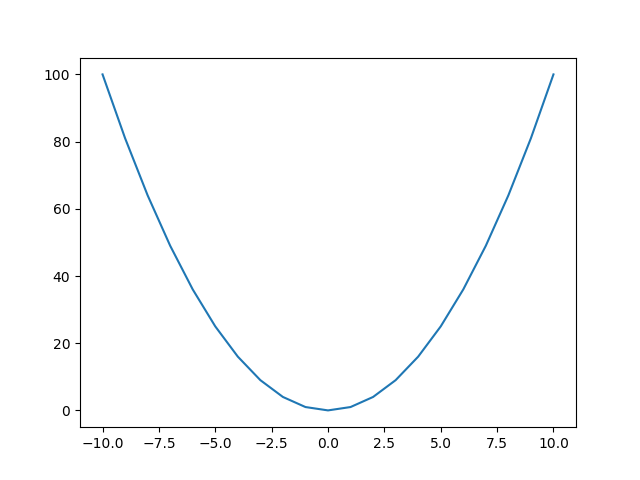

In [79]:
plt.plot(numbers.keys(), numbers.values())
plt.show()

The rest of the code provides a more useful worked example of the things we've done so far in this notebook. We have written a function that allows us to pass it dataframes, local authority names, ethnicities, and time periods, to find out how many children there are of a given ethnicity in a given la in a given time period. Try running it a few times changing the ethnicities, time codes, and LAs to see what its doing.

It defines a function called eth_count and allows it to take vlaues df (for dataframe), la (for la name), eth (for ethnicity) and tp (for time period). It then makes four conditions to slice out the input dataframe by whatever is passed to these variables in the function and performs the slice. Next it sums the headcount column of the sliced dataframe and returns the value, meaning and variable set equal to the function with vlaue sinput will equal the returned variable.

The cell then runs the function using the data df from the beginning of the notebook, wigan, white british, and 202122 as the variables, passing rthe answer of the sum of the headcount to wigan_white, giving the vlaue of the numbe rof White British students in Wigan in 202122. Finally, it prints the valuee.

Note: the function is written in the abstract sp whatever (valid) value you pass to it, it'll work for! When wiriting functions, you just have to remember not to hard code values you want to be variable based on inputs.

In [80]:
def eth_count(df, la, eth, tp):
    condition_1 = df['la_name'] == la
    condition_2 = df['ethnicity'] == eth
    condition_3 = df['time_period'] == tp
    condition_4 = df['phase_type_grouping'] == 'Total'
    sliced_df = df[condition_1 & condition_2 & condition_3 & condition_4]
    headcount = sliced_df['headcount'].sum()
    return headcount
    
wigan_white = eth_count(data, 'Wigan', 'White - White British', 202122)
print(wigan_white)

42274


Again, to demonstrate the value of functions, we call the function again changing the values showing how easy it is, once we have a function, to use it again and again to extract insights and data.

In [86]:
croydon_white = eth_count(data, 'Croydon', 'White - White British', 202122)
print(croydon_white)

14184
16832


In [87]:
sutton_201516_ = eth_count(data, 'Sutton', 'Asian - Bangladeshi', 201516)
print(sutton_201516_)

302


More than running functions multiple times by manually chosing selections, as we could do that with a set of index matches in excel, we can start to automate running our funcitons with for loops, like we did earlier with the squarer function. Lets say we wanted to see how the White British population has changed in Wigan for the data in the input CSV, we can iterate through all the unique time periods in the data, performing the calculation eth_count each time, adding the years and headcounts to a dicitonary, and then printing it.

In [88]:
white_pop = {}
for year in data['time_period'].unique():
    v =(eth_count(data, 'Wigan', 'White - White British', year))
    k = year
    white_pop[k] = v

In [89]:
print(white_pop)

{202122: 42274, 202021: 42620, 201920: 42911, 201819: 42839, 201718: 42720, 201617: 37553, 201516: 37388}


Finally, we can use that information to plot how the headcounts change! We could also use for loops to do this for every different LA, and/or every ethnicity, in justa  few more lines of code.

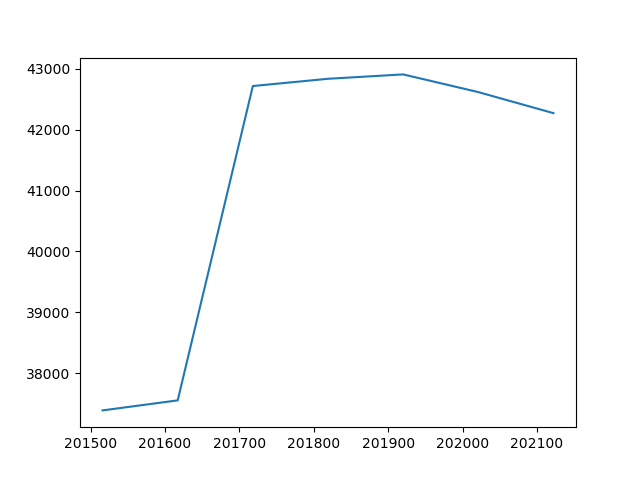

In [91]:
plt.plot(white_pop.keys(), white_pop.values())
plt.show()

Just to prove it, in just a  few lines, I've plotted how the total headcount of children from each ethnicity has changed through the years in Wigan. I've also added a couple of lines to format the plots better.

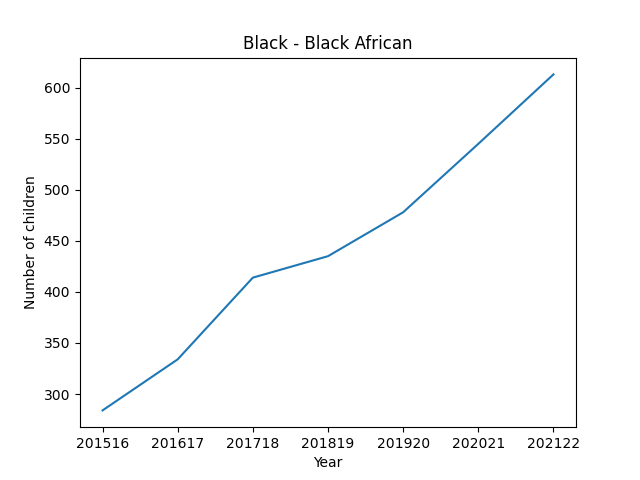

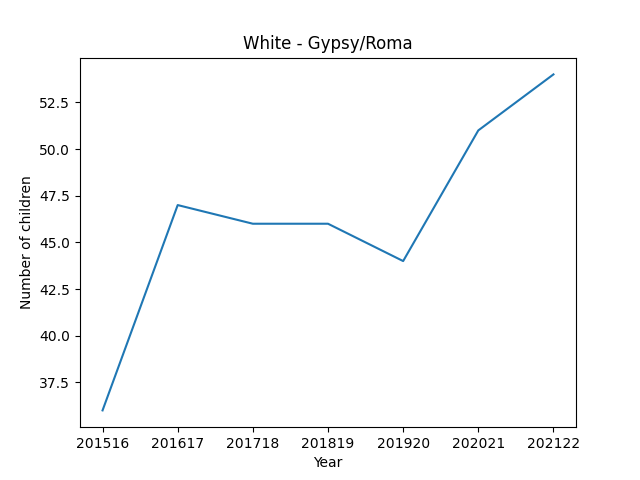

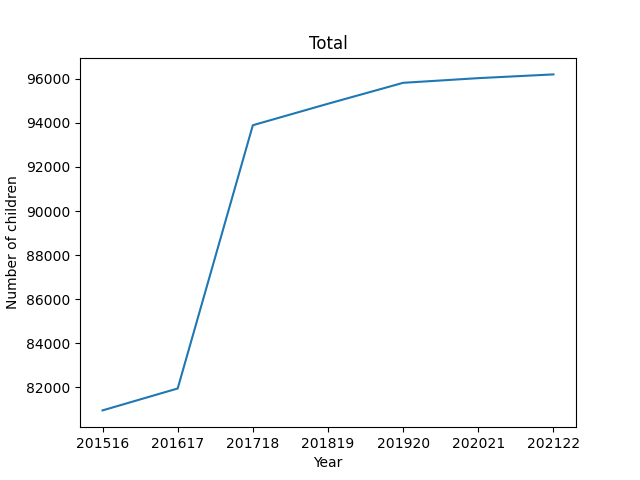

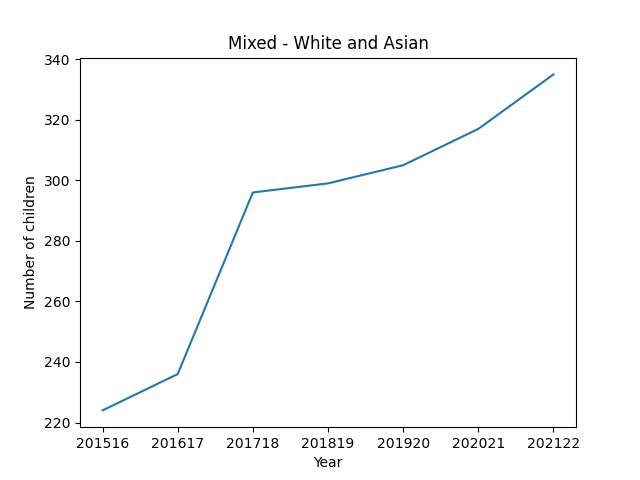

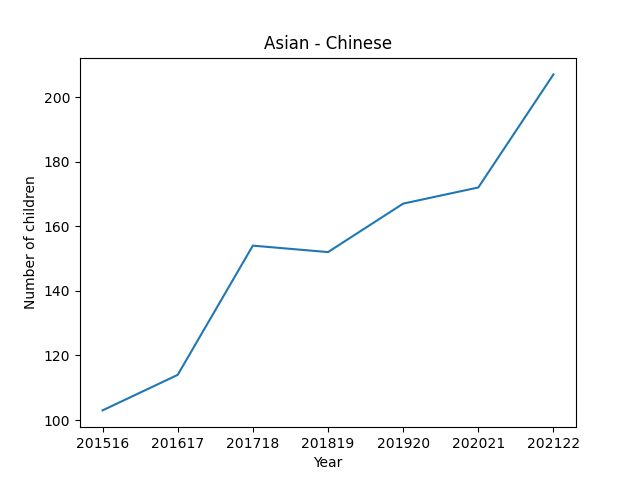

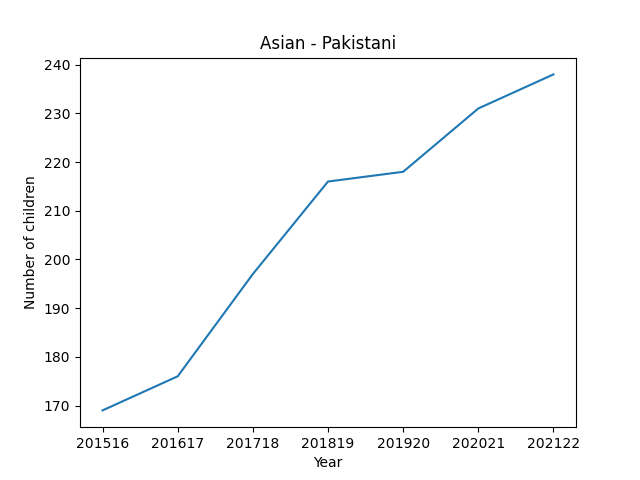

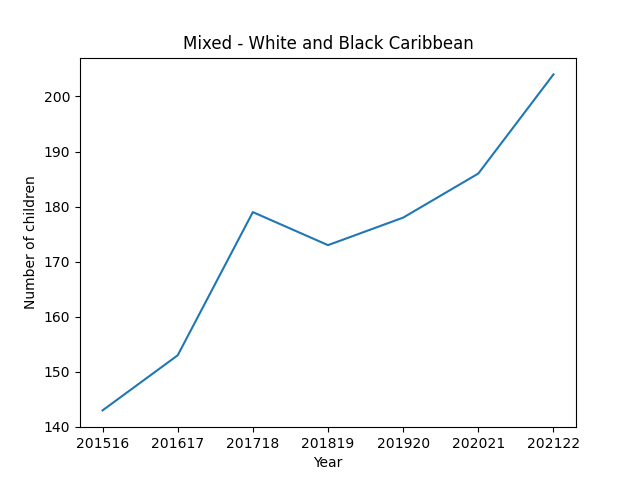

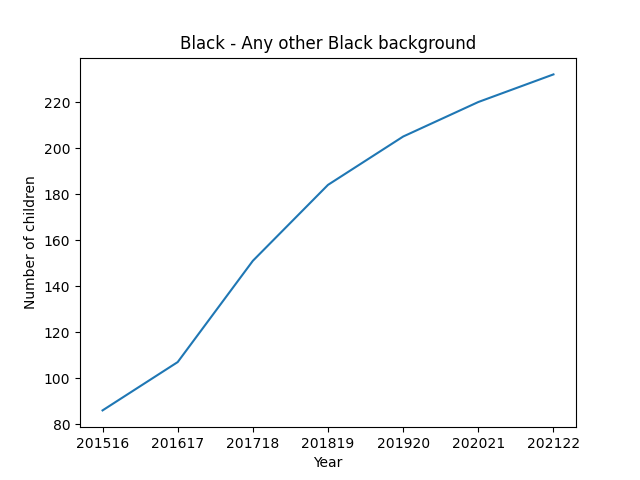

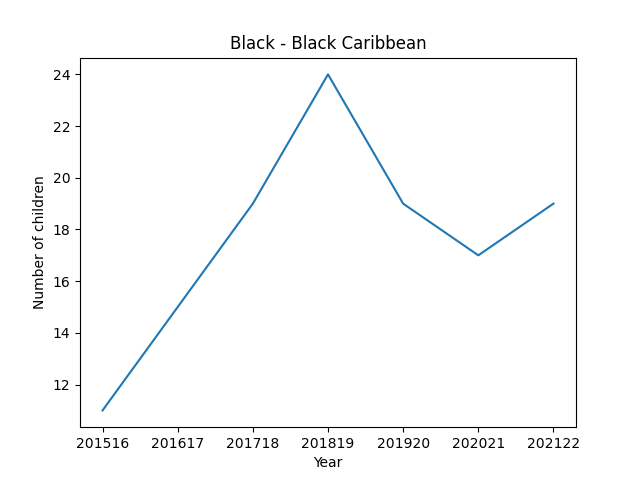

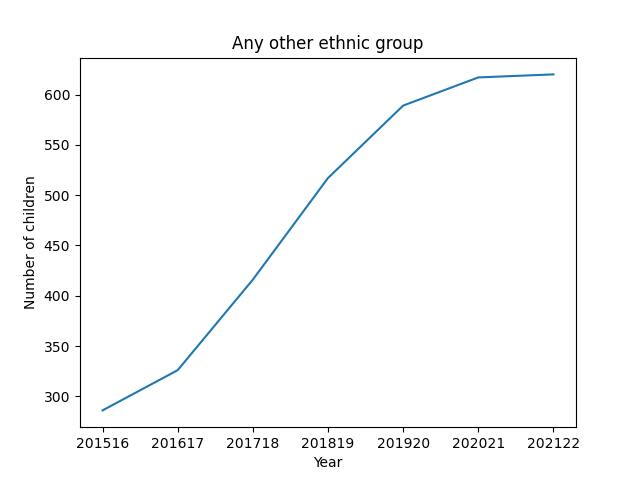

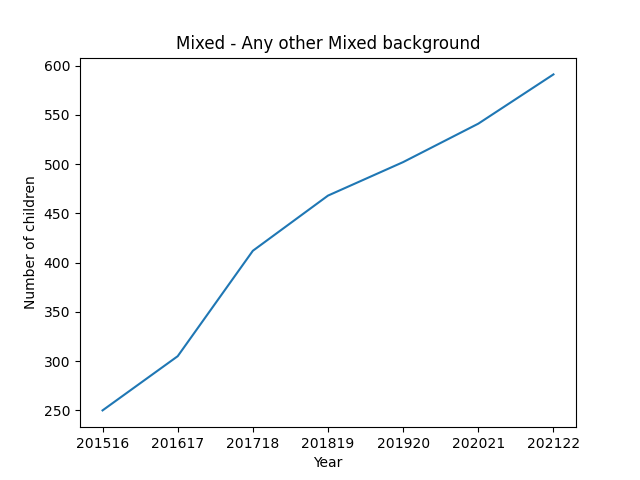

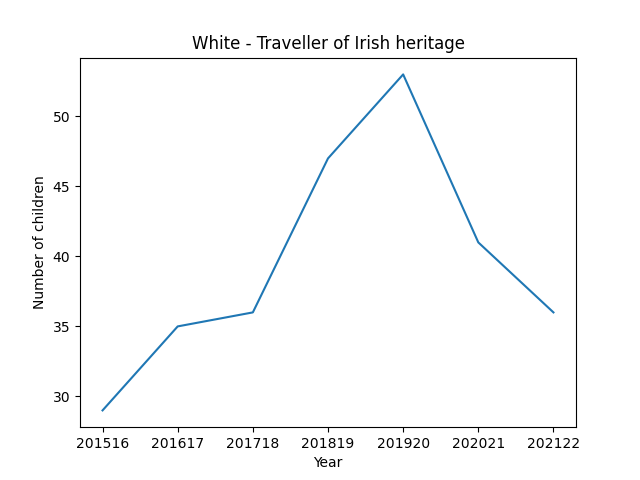

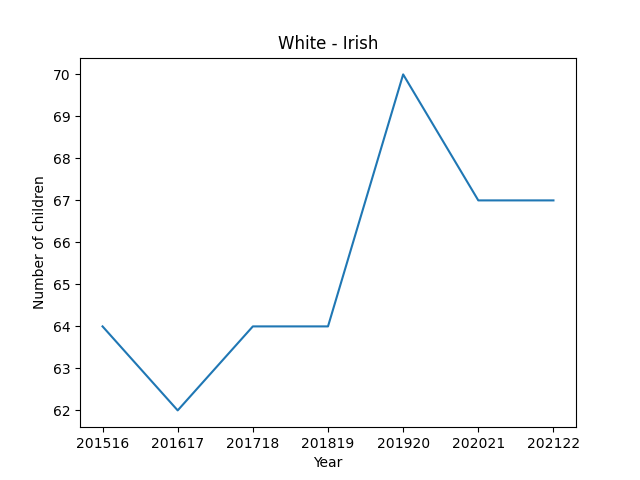

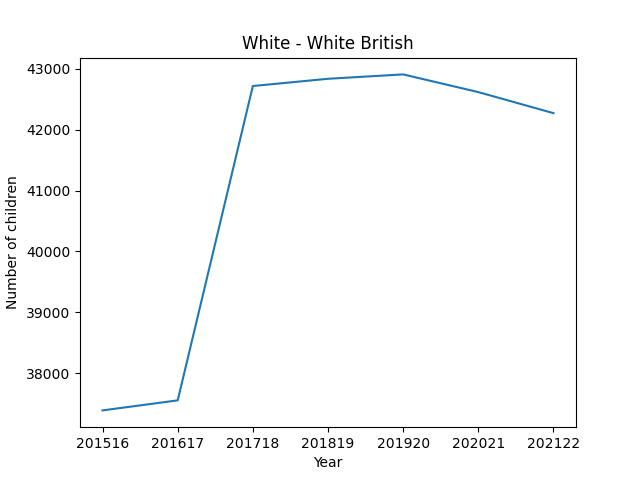

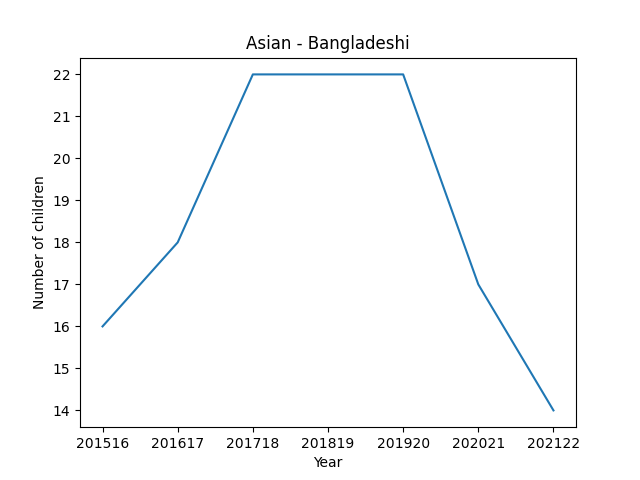

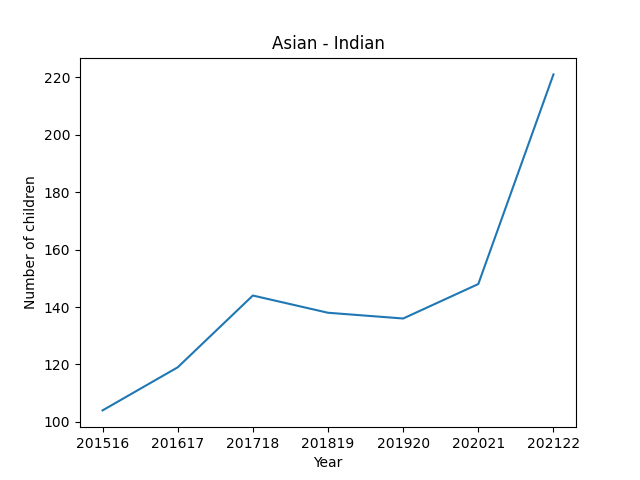

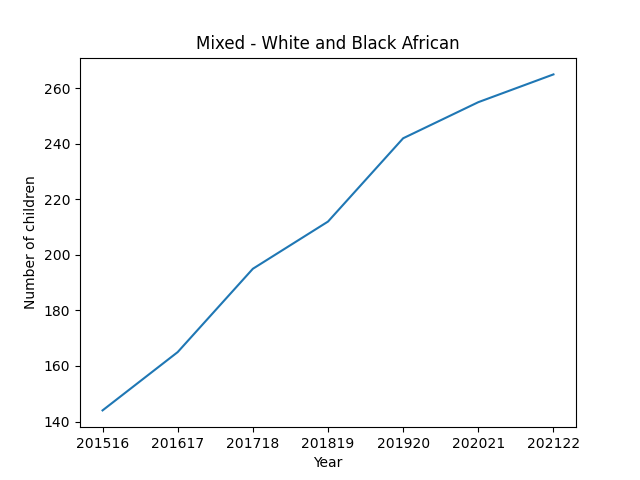

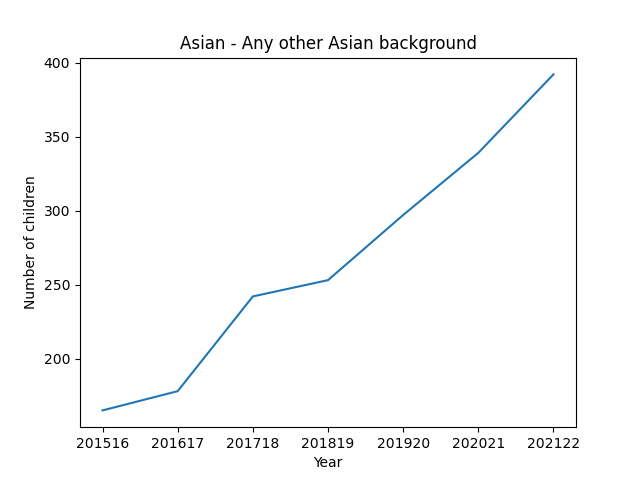

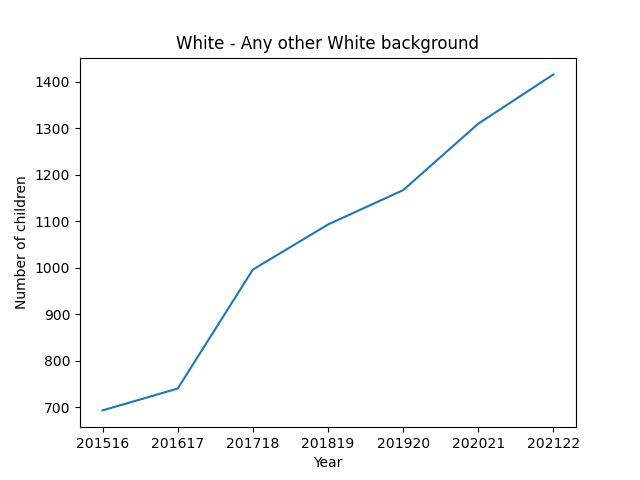

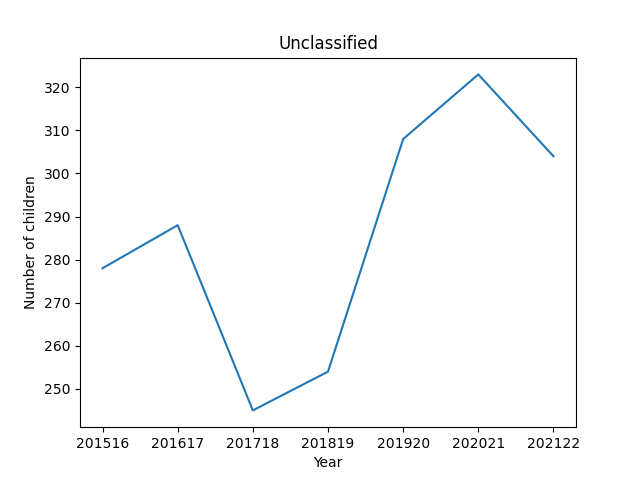

In [111]:
for ethnicity in data['ethnicity'].unique():
    ethnic_pop = {}
    for year in data['time_period'].unique():
        v =(eth_count(data, 'Wigan', ethnicity, year))
        k = year
        ethnic_pop[k] = v
    plt.plot(ethnic_pop.keys(), ethnic_pop.values())
    plt.title(ethnicity)
    plt.xlabel('Year')
    plt.ylabel('Number of children')
    plt.xticks([201516,201617,201718,201819,201920,202021,202122])
    plt.show()
    plt.clf()